In [1]:
import import_ipynb
from hormigas import *

# from ipynb.fs.full.algoritmos import *
import csv

importing Jupyter notebook from hormigas.ipynb


In [2]:
def algoritmo_SH(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, nodo_inicial=None):
    
    # Aplicamos la semilla
    random.seed(semilla)
    
    # Representacion
    xs, ys = [], []
    
    # Inicializamos los atributos de la clase Hormiga
    Hormiga.num_nodos = num_nodos
    Hormiga.distancias = distancias
    
    # Inicializamos la matriz de feromonas
    feromona = [[feromona_ini]*len(nodos) for i in range(len(nodos))]
    
    mejor_global = None
    for it in range(num_iteraciones):
        
        # Inicializamos las hormigas al nodo inicial
        hormigas = []
        for k in range(num_hormigas):
            hormigas.append(Hormiga(nodo_inicial))
        
        # Construcción de soluciones por las hormigas
        for i in range(num_hormigas):
            for k in range(num_nodos-1):
                # Añadimos el nodo resultante de aplicar la regla de transición
                hormigas[i].add(regla_transicion(hormigas[i], feromona, heuristica, alpha, beta))
            
        # Actualización de feromona: Aporte y evaporación
        for i in range(num_nodos):
            for j in range(num_nodos):
                feromona[i][j] = actualizacion_feromona(feromona[i][j], hormigas, evaporacion, i, j)
                
        # Actualización de la mejor solucion global
        mejor_actual = min(hormigas)

        if mejor_global is None or mejor_actual < mejor_global:
            mejor_global = mejor_actual
            
        # Representación
        xs.append(it)
        ys.append(mejor_global.coste)
            
    return [mejor_global, semilla, xs, ys]

In [3]:
def algoritmo_SHE(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, num_elite, nodo_inicial=None):
    
    # Aplicamos la semilla
    random.seed(semilla)
    
    # Representacion
    xs, ys = [], []
    
    # Inicializamos los atributos de la clase Hormiga
    Hormiga.num_nodos = num_nodos
    Hormiga.distancias = distancias
    
    # Inicializamos la matriz de feromonas
    feromona = [[feromona_ini]*len(nodos) for i in range(len(nodos))]
    
    mejor_global = None
    for it in range(num_iteraciones):
        
        # Inicializamos las hormigas al nodo inicial
        hormigas = []
        for k in range(num_hormigas):
            hormigas.append(Hormiga(nodo_inicial))
        
        # Construcción de soluciones por las hormigas
        for i in range(num_hormigas):
            for k in range(num_nodos-1):
                # Añadimos el nodo resultante de aplicar la regla de transición
                hormigas[i].add(regla_transicion(hormigas[i], feromona, heuristica, alpha, beta))
            
        # Actualización de feromona: Aporte y evaporación
        for i in range(num_nodos):
            for j in range(num_nodos):
                feromona[i][j] = actualizacion_feromona_elite(feromona[i][j], hormigas, evaporacion, i, j, num_elite)
                
        # Actualización de la mejor solucion global
        mejor_actual = min(hormigas)

        if mejor_global is None or mejor_actual < mejor_global:
            mejor_global = mejor_actual
            
        # Representación
        xs.append(it)
        ys.append(mejor_global.coste)
            
    return [mejor_global, semilla, xs, ys]

# Sistema de Hormigas

Sistema de Hormigas


KeyboardInterrupt: 

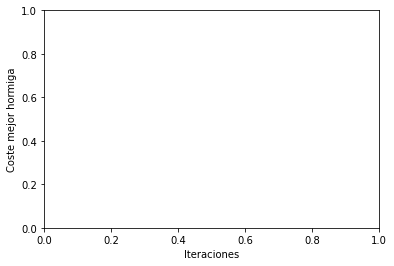

<Figure size 864x864 with 0 Axes>

In [8]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Coste mejor hormiga')

algoritmo = "Sistema de Hormigas"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
num_nodos = len(nodos)    # Fichero
distancias = getMDistancias(nodos)
semilla = random.randint(0,9999999)

# PARAMETROS DEL ALGORITMO
num_hormigas = 10
num_iteraciones = 100
feromona_ini = 1 / (num_nodos * getCosteCamino(algoritmoGreedy(distancias), distancias))
alpha = 1
beta = 2
evaporacion = 0.1

# Iniciamos la heuristica 1/d
heuristica = []
for row in range(len(distancias)):
    heuristica.append([1/(x+0.01) for x in distancias[row]])

t = time.time()

# with Pool(processes=6) as p:
#        resultados = p.starmap(algoritmo_SH, product([semilla], [num_nodos], [distancias], [num_hormigas], [num_iteraciones], [feromona_ini], [heuristica], [alpha], [beta], [evaporacion]))[0]


resultados = algoritmo_SH(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion)

elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

coste = resultados[0].coste

print("Mejor sol Coste: %s \t Semilla: %s" % (coste, semilla) ) 

xs = resultados[2]
ys = resultados[3]

plt_dynamic(fig, xs, ys, ax)


titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(resultados[0].camino, nodos, titulo)

# Sistema de Hormigas Elitista

Sistema de Hormigas
Tiempo de ejecución: 25.547504

Mejor sol Coste: 866 	 Semilla: 3188824


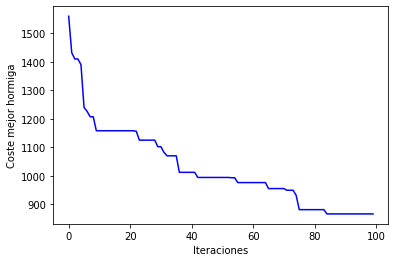

<Figure size 864x864 with 0 Axes>

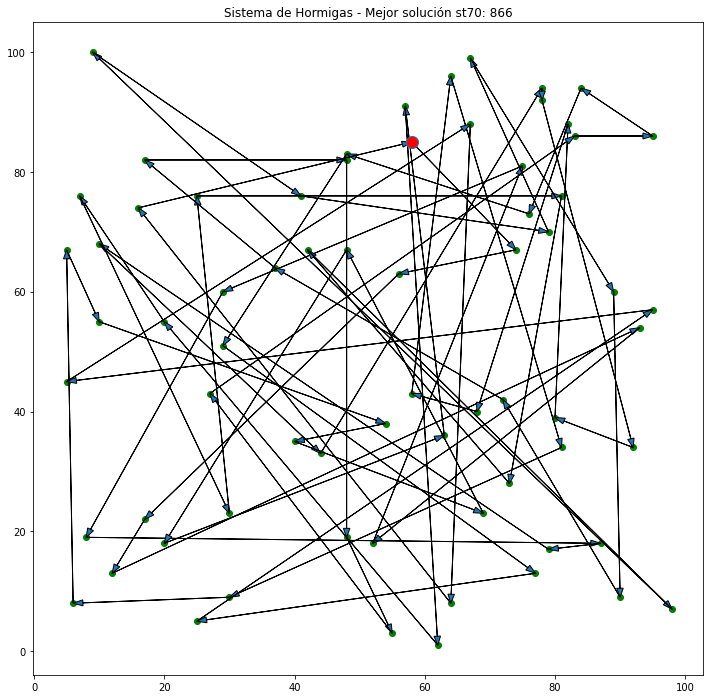

In [4]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Coste mejor hormiga')

algoritmo = "Sistema de Hormigas Elitista"
print(algoritmo)
fichero = "st70"
nodos = leeFichero(fichero)
num_nodos = len(nodos)    # Fichero
distancias = getMDistancias(nodos)
semilla = random.randint(0,9999999)

# PARAMETROS DEL ALGORITMO
num_hormigas = 2
num_iteraciones = 100
feromona_ini = 1 / (num_nodos * getCosteCamino(algoritmoGreedy(distancias), distancias))
alpha = 1
beta = 2
evaporacion = 0.1
num_elite = 15

# Iniciamos la heuristica 1/d
heuristica = []
for row in range(len(distancias)):
    heuristica.append([1/(x+0.01) for x in distancias[row]])

t = time.time()

# with Pool(processes=6) as p:
#        resultados = p.starmap(algoritmo_SH, product([semilla], [num_nodos], [distancias], [num_hormigas], [feromona_ini], [heuristica], [alpha], [beta], [evaporacion]))[0]


resultados = algoritmo_SHE(semilla, num_nodos, distancias, num_hormigas, num_iteraciones, feromona_ini, heuristica, alpha, beta, evaporacion, num_elite)

elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

coste = resultados[0].coste

print("Mejor sol Coste: %s \t Semilla: %s" % (coste, semilla) ) 

xs = resultados[2]
ys = resultados[3]

plt_dynamic(fig, xs, ys, ax)


titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(resultados[0].camino, nodos, titulo)